# Import librairies

In [1]:
import pandas as pd
import numpy as np

# Reading the dataset and getting first info

In [2]:
df = pd.read_csv('SPB_FL_1892_2020.csv')

In [3]:
df.head()

,COOPID,YEAR,MONTH,DAY,PRECIPITATION,MAX TEMP,MIN TEMP,MEAN TEMP
0,87886,1892,1,1,-99.99,78.0,60.0,69.0
1,87886,1892,1,2,-99.99,71.0,52.0,61.5
2,87886,1892,1,3,-99.99,55.0,42.0,48.5
3,87886,1892,1,4,-99.99,58.0,34.0,46.0
4,87886,1892,1,5,-99.99,70.0,53.0,61.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46844 entries, 0 to 46843
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COOPID          46844 non-null  int64  
 1    YEAR           46844 non-null  int64  
 2    MONTH          46844 non-null  int64  
 3    DAY            46844 non-null  int64  
 4    PRECIPITATION  46844 non-null  float64
 5    MAX TEMP       46844 non-null  float64
 6    MIN TEMP       46844 non-null  float64
 7    MEAN TEMP      46844 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.9 MB


In [5]:
df.columns

Index(['COOPID', ' YEAR', ' MONTH', ' DAY', ' PRECIPITATION', ' MAX TEMP',
       ' MIN TEMP', ' MEAN TEMP'],
      dtype='object')

Column names are inconsistent.  
1. Delete spaces. 
2. Adjust the column names to the lower case with capitalized first one.

In [6]:
# reformat the column names: 
column_names = [x.strip().title() for x in df.columns]

In [7]:
column_names

['Coopid',
 'Year',
 'Month',
 'Day',
 'Precipitation',
 'Max Temp',
 'Min Temp',
 'Mean Temp']

In [8]:
# rename the columns in the dataframe: 
df.columns = column_names

In [9]:
df.head()

,Coopid,Year,Month,Day,Precipitation,Max Temp,Min Temp,Mean Temp
0,87886,1892,1,1,-99.99,78.0,60.0,69.0
1,87886,1892,1,2,-99.99,71.0,52.0,61.5
2,87886,1892,1,3,-99.99,55.0,42.0,48.5
3,87886,1892,1,4,-99.99,58.0,34.0,46.0
4,87886,1892,1,5,-99.99,70.0,53.0,61.5


In [10]:
df.Coopid.unique()

array([87886])

Looks like `Coopid` column doesn't contain any valuable information for this project. 

In [11]:
df.drop('Coopid', axis=1, inplace=True)

In [12]:
df.describe()

,Year,Month,Day,Precipitation,Max Temp,Min Temp,Mean Temp
count,46844.000000,46844.000000,46844.000000,46844.000000,46844.000000,46844.000000,46844.000000
mean,1955.494855,6.514025,15.755102,-52.161705,-10.775344,-18.295929,-14.609446
std,36.947066,3.451197,8.811201,50.019984,90.933819,83.371046,87.135967
min,1892.000000,1.000000,1.000000,-99.990000,-99.900000,-99.900000,-99.900000
25%,1923.000000,4.000000,8.000000,-99.990000,-99.900000,-99.900000,-99.900000
50%,1955.000000,7.000000,16.000000,-99.990000,-99.900000,-99.900000,-99.900000
75%,1987.000000,10.000000,23.000000,0.000000,83.000000,68.000000,75.500000
max,2020.000000,12.000000,31.000000,15.450000,100.000000,89.000000,89.500000


Nothing unusual with Year, Month and Day data.  <br>
Weather data seems to have n/a values replaced by negative values.  <br>
Precipitation values have no value for the purpose of this project and can be dropped. <br>
Temperature is given in Fahrenheit. <br>
Mean Temperature column can be dropped and recalculated after n/a's would be droppend and min and max. converted into Celcius.    

In [13]:
df.drop(labels=['Precipitation', 'Mean Temp'], axis=1, inplace=True)

In [14]:
df.head()

,Year,Month,Day,Max Temp,Min Temp
0,1892,1,1,78.0,60.0
1,1892,1,2,71.0,52.0
2,1892,1,3,55.0,42.0
3,1892,1,4,58.0,34.0
4,1892,1,5,70.0,53.0


# EDA

## n/a values

In [15]:
df[['Max Temp', 'Min Temp']] = df[['Max Temp',
                                   'Min Temp']].replace(to_replace=-99.900000,
                                                        value=np.nan)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46844 entries, 0 to 46843
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      46844 non-null  int64  
 1   Month     46844 non-null  int64  
 2   Day       46844 non-null  int64  
 3   Max Temp  23006 non-null  float64
 4   Min Temp  22999 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.8 MB


### Drop all rows with missing values

In [17]:
df.dropna(how='any', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22983 entries, 0 to 46843
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      22983 non-null  int64  
 1   Month     22983 non-null  int64  
 2   Day       22983 non-null  int64  
 3   Max Temp  22983 non-null  float64
 4   Min Temp  22983 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.1 MB


## Temperature values

### Temperature converter

In [19]:
def max_f_to_c(row):
    return int((row['Max Temp'] - 32) * 5 / 9)

def min_f_to_c(row):
    return int((row['Min Temp'] - 32) * 5 / 9)

In [20]:
df['Max C'] = df.apply(max_f_to_c, axis=1)

In [21]:
df['Min C'] = df.apply(min_f_to_c, axis=1)

### Drop Fahrenheit values and rename columns

In [22]:
df = df.drop(['Max Temp', 'Min Temp'], axis=1)

In [23]:
df.rename({'Max C':'Max Temp', 'Min C':'Min Temp'}, axis=1, inplace=True)

In [24]:
df.head()

,Year,Month,Day,Max Temp,Min Temp
0,1892,1,1,25,15
1,1892,1,2,21,11
2,1892,1,3,12,5
3,1892,1,4,14,1
4,1892,1,5,21,11


### Adding mean value

In [25]:
df['Avg Temp'] = np.mean(df[['Min Temp', 'Max Temp']], axis=1)

In [26]:
df.head()

,Year,Month,Day,Max Temp,Min Temp,Avg Temp
0,1892,1,1,25,15,20.0
1,1892,1,2,21,11,16.0
2,1892,1,3,12,5,8.5
3,1892,1,4,14,1,7.5
4,1892,1,5,21,11,16.0


### !!!! Outliners

## Data transformation

In [27]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [28]:
# adding day of week data: 
df['DoW'] = df.Date.dt.dayofweek

In [29]:
df.drop('Year', axis=1, inplace=True)

In [36]:
df.set_index('Date', inplace=True)

In [37]:
df.head()

,Month,Day,Max Temp,Min Temp,Avg Temp,DoW
Date,,,,,,
1892-01-01,1,1,25,15,20.0,4
1892-01-02,1,2,21,11,16.0,5
1892-01-03,1,3,12,5,8.5,6
1892-01-04,1,4,14,1,7.5,0
1892-01-05,1,5,21,11,16.0,1


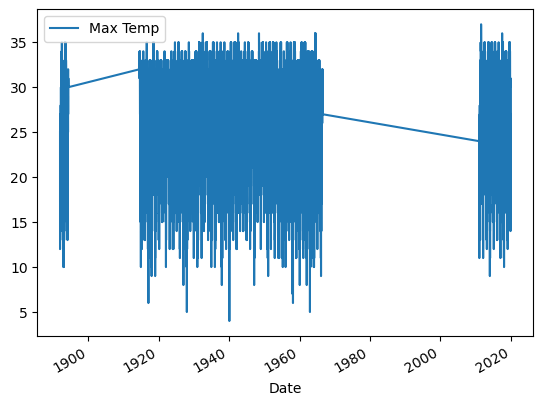

In [38]:
df.plot(y='Max Temp', use_index=True, kind='line'); 

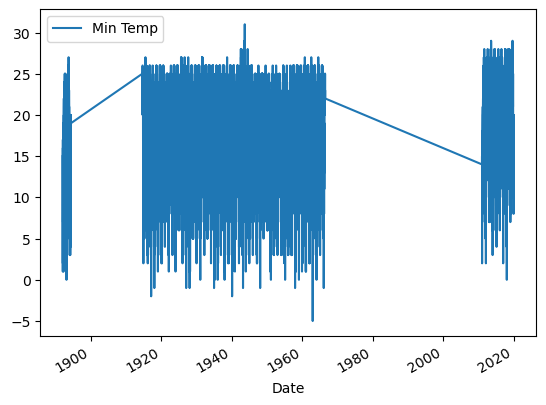

In [39]:
df.plot(y='Min Temp', use_index=True, kind='line'); 